In [1]:
import numpy as np
import matplotlib.pyplot as plt
input_patterns=np.load('input_patterns.npy')
weights=np.load('weights.npy')

In [25]:
def update_theta(theta_BCM,post_syn_patterns,pre_syn_patterns):
    dt=0.001
    BCM_target = 2.0
    tau_BCM=0.01
    post_syn_patterns += dt*(-1*post_syn_patterns + np.dot(W,update_rates(pre_syn_patterns)))
    Ex= post_syn_patterns*(0.5 * (np.sign(post_syn_patterns) + 1))
    theta_BCM+=dt*(-theta_BCM+(post_syn_patterns*(post_syn_patterns/BCM_target)))/tau_BCM
    return theta_BCM

def update_w(W,pre_syn_patterns,post_syn_patterns,theta_BCM):
    dt=0.01
    tau_w=0.01
    W_max=1.0
    W+=dt*(-W+pre_syn_patterns*np.dot(post_syn_patterns,(post_syn_patterns-theta_BCM)))/tau_w
    W = W*(0.5 * (np.sign(W) + 1))

    # bounding weights below max value
    W[W>W_max] = W_max
    return W


def update_rates(x):
    #rates = x
    r_0 = 1.0
    r_max = 20.0
    x[x<=0] = r_0*np.tanh(x[x<=0]/r_0)
    x[x>0] = (r_max-r_0)*np.tanh(x[x>0]/(r_max-r_0))
    return x
def one_timestep(W,pre_syn_patterns,post_syn_patterns,theta_BCM):
    dt=0.001
    #new_W=update_w(W,pre_syn_patterns,post_syn_patterns,theta_BCM)
    #new_theta_BCM=update_theta(theta_BCM,W,post_syn_patterns)
    post_syn_patterns += dt*(-1*post_syn_patterns + np.dot(W,update_rates(pre_syn_patterns)))
    post_syn_patterns= post_syn_patterns*(0.5 * (np.sign(post_syn_patterns) + 1))
    theta_BCM=update_theta(theta_BCM,post_syn_patterns,pre_syn_patterns)
    W=update_w(W,pre_syn_patterns,post_syn_patterns,theta_BCM)
    #theta_BCM=update_theta(theta_BCM,W,post_syn_patterns)
    #return post_syn_patterns,new_W,new_theta_BCM
    return post_syn_patterns,W,theta_BCM

def run_sim(W,pre_syn_patterns):
    post_syn_patterns=np.array([0.0])
    T=10000
    Ws=[]
    theta_BCM=np.array([0.5])
    
    
    xs=[]
    for i in range(T):
        post_syn_patterns, W, theta_BCM=one_timestep(W,pre_syn_patterns[:,i],post_syn_patterns,theta_BCM)
        #print(post_syn_patterns)
        #print(W)
        Ws.append(W)
        xs.append(post_syn_patterns)
    xs=np.array(xs)
    return xs, Ws

In [26]:
W=weights.copy()*0.0001
print(W)
pre_syn_patterns=input_patterns
xs,Ws=run_sim(W,pre_syn_patterns)

[7.96269589e-04 6.48374340e-04 6.33272184e-04 ... 1.64408282e-04
 8.32541703e-05 8.59732262e-05]


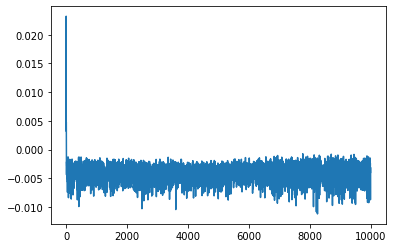

In [27]:
plt.plot(xs)

In [21]:
print(xs)

[[1.9780865]
 [1.9780865]
 [1.9780865]
 ...
 [1.9780865]
 [1.9780865]
 [1.9780865]]
